# ML Facial Recognition to Detect Mood and Suggest Songs Accordingly
# Author : Nischitha D
# Data Science Intern @Letsgrowmore

In [2]:
import numpy as np
import cv2
import os
import random
from skimage.io import imread
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from IPython.display import Audio

In [3]:
test_dir = "C:/Users/NISCHITHA/Desktop/Music dataset/test"
train_dir ="C:/Users/NISCHITHA/Desktop/Music dataset/train"

In [4]:
row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path +"/" +expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1067       831


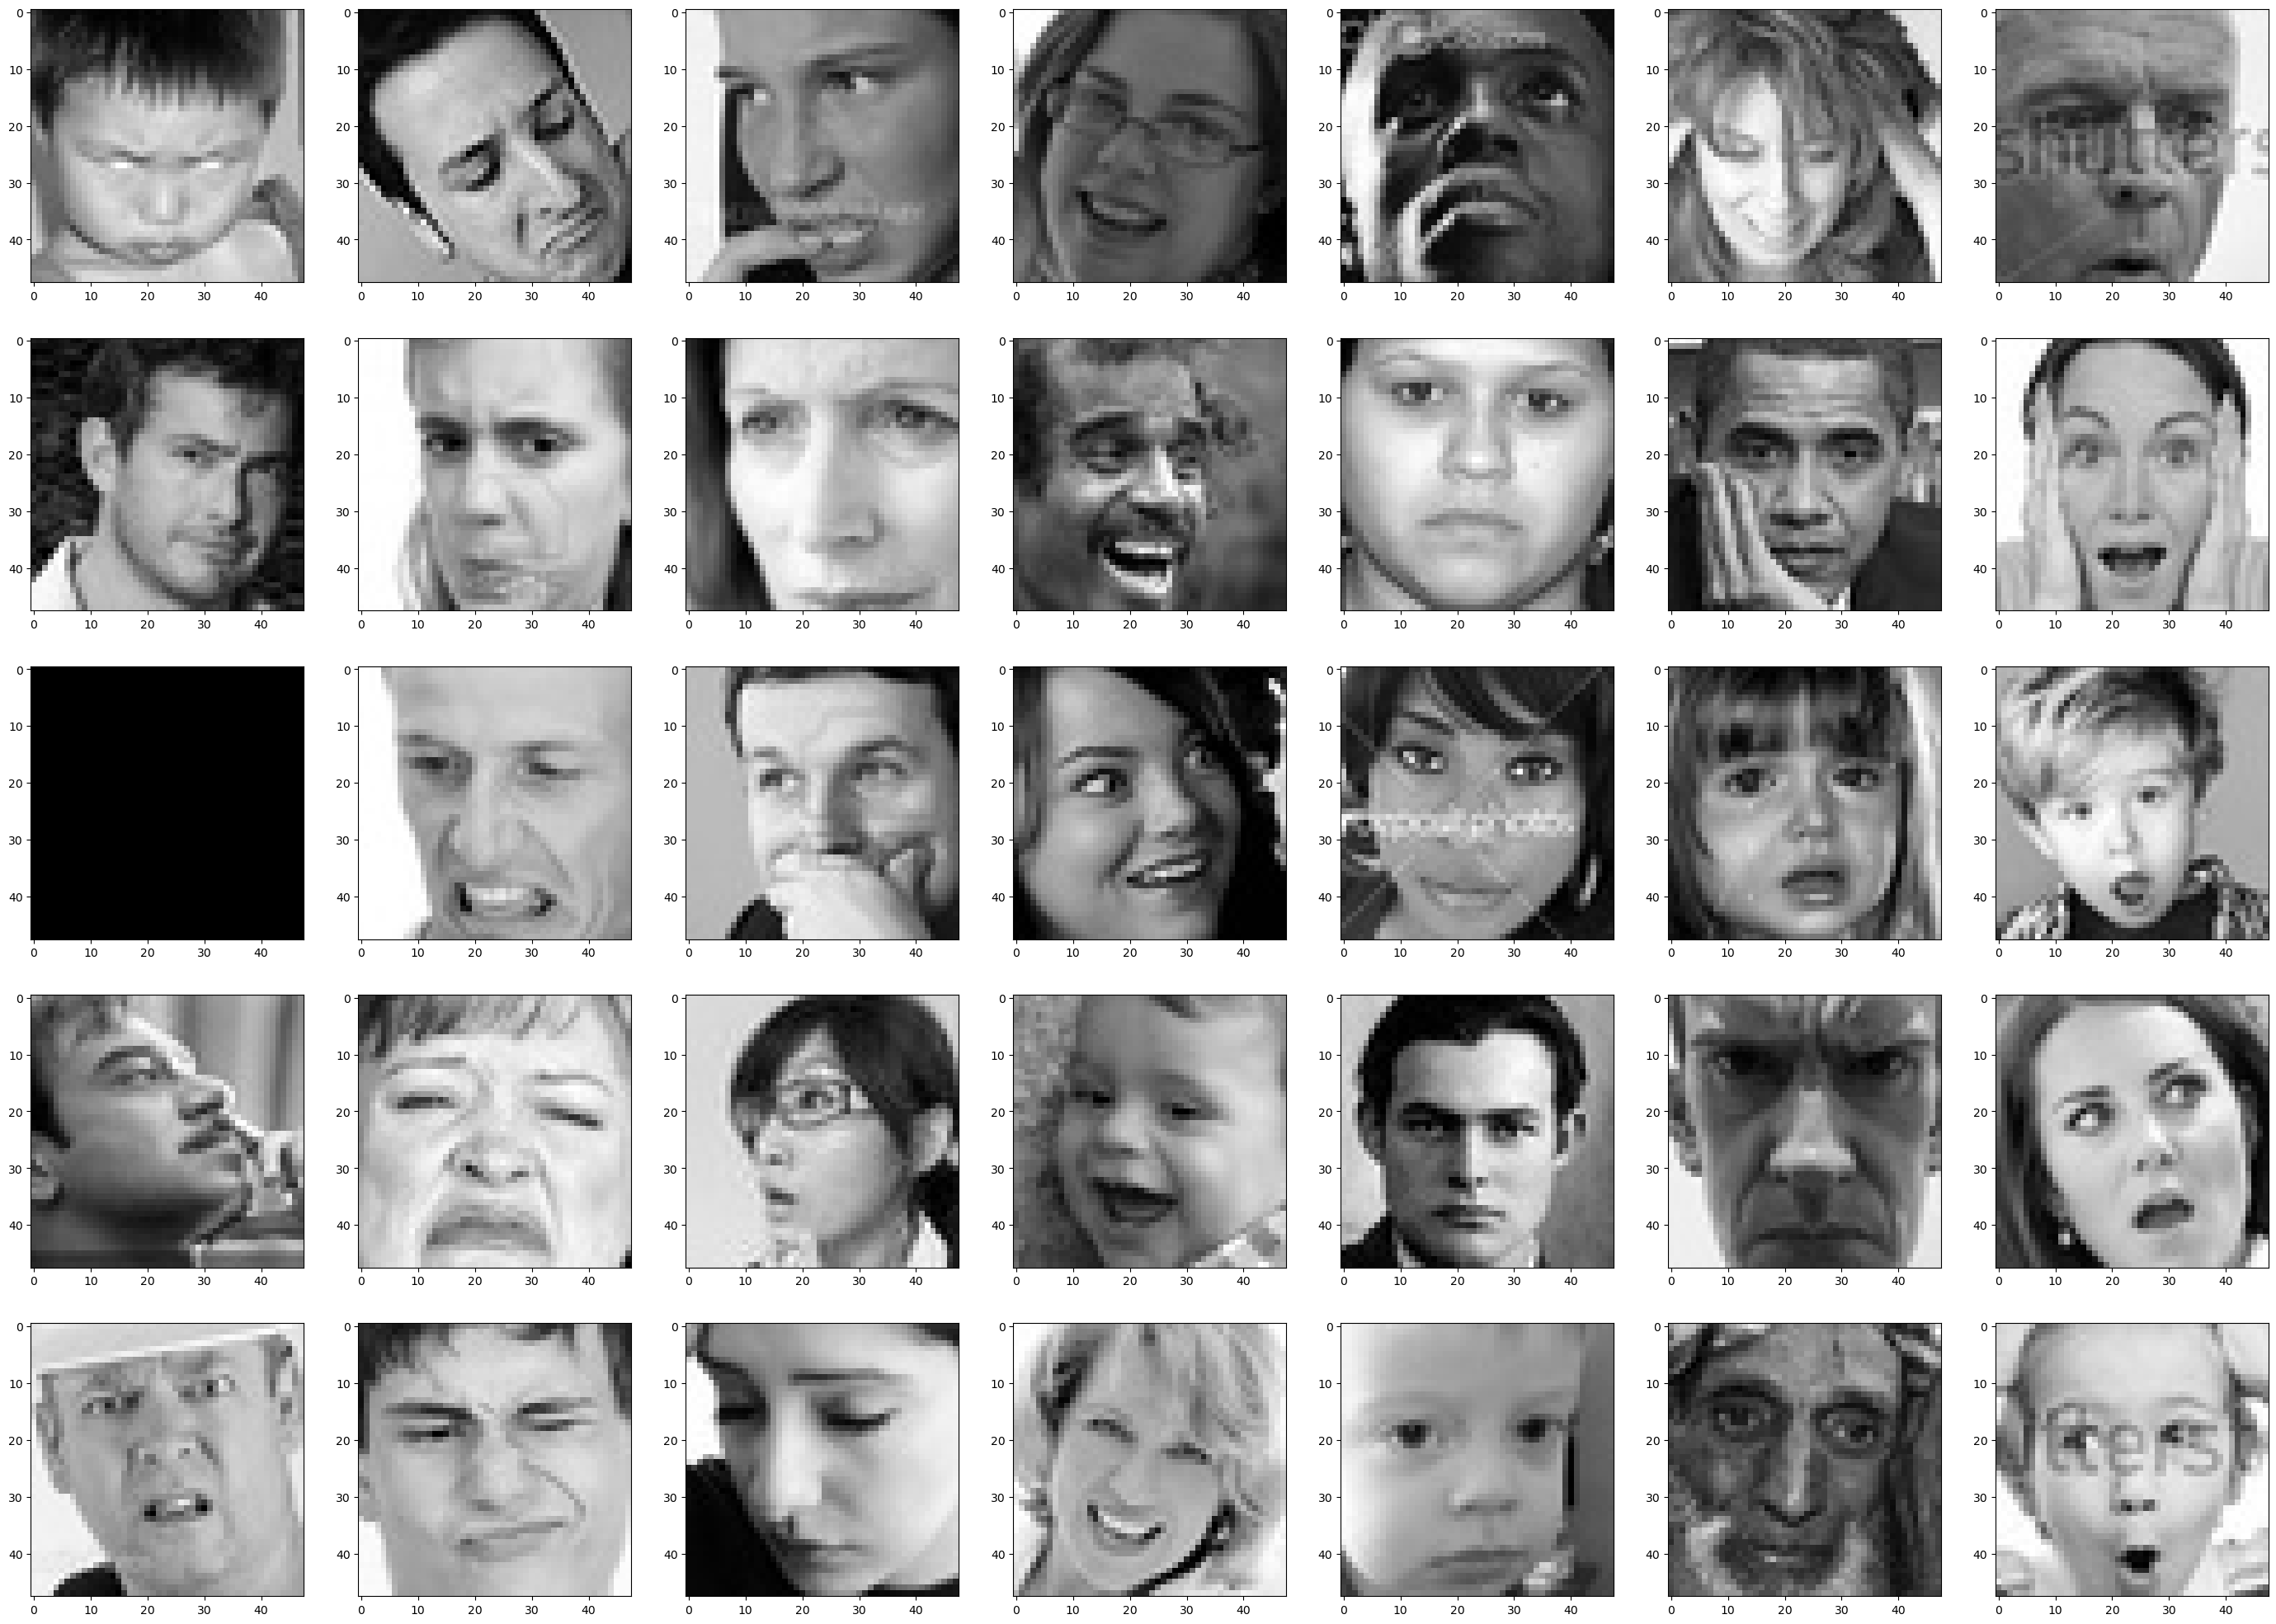

In [5]:
from skimage.io import imread
import os
import matplotlib.pyplot as plt

test_dir = "C:/Users/NISCHITHA/Desktop/Music dataset/test"
train_dir ="C:/Users/NISCHITHA/Desktop/Music dataset/train"
total_labels = len(os.listdir(train_dir))

fig, ax = plt.subplots(nrows=5, ncols=total_labels, figsize=(35, 25))
for x in range(5):
    for y, v in zip(range(total_labels), os.listdir(train_dir)):
        img_folder = os.path.join(train_dir, v)
        img_file = os.listdir(img_folder)[x]
        img_path = os.path.join(img_folder, img_file)
        ax[x][y].imshow(imread(img_path), cmap='gray')

plt.show()

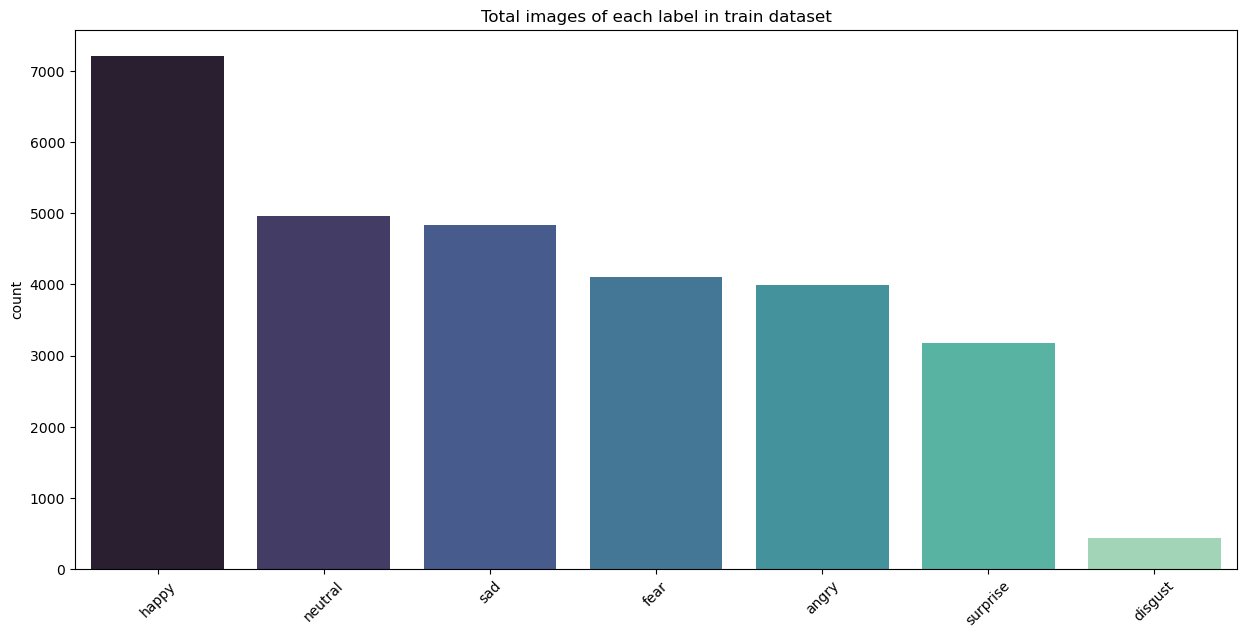

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_dir = "C:/Users/NISCHITHA/Desktop/Music dataset/train"

df = {}
for i in os.listdir(train_dir):
    directory = os.path.join(train_dir, i)  # Correct way to join paths
    df[i] = len(os.listdir(directory))

df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total", ascending=False)

plt.figure(figsize=(15,7))
sns.barplot(x=df.index, y="total", palette="mako", data=df)
plt.ylabel("count")
plt.title("Total images of each label in train dataset")
plt.xticks(rotation=45)
plt.show()

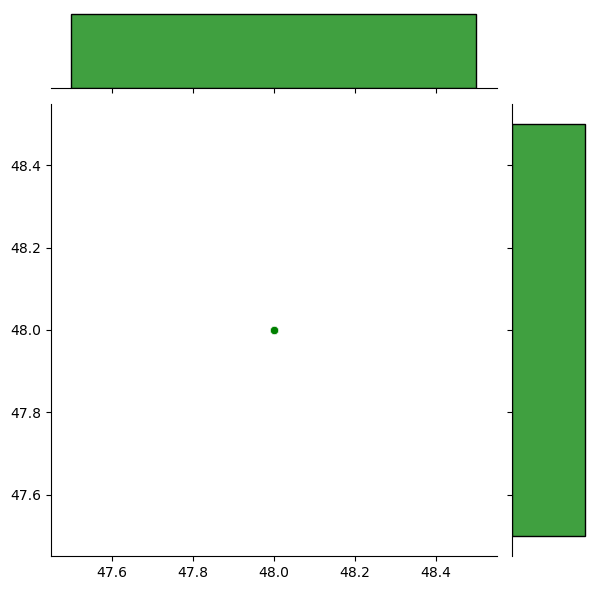

In [7]:
happy_dir = os.path.join(train_dir, 'happy')  # Construct the full path to the 'happy' label directory
happy_images = os.listdir(happy_dir)

dim1, dim2 = [], []

for img_filename in happy_images:
    img_path = os.path.join(happy_dir, img_filename)  # Construct the full path to the image file
    img = imread(img_path)
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)
import seaborn as sns

sns.jointplot(x=dim1, y=dim2, color='g')
plt.show()


In [8]:
train_gen = ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_gen = ImageDataGenerator(rescale=1/255)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)

train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_gen.flow_from_directory(directory=test_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=False)

Found 28709 images belonging to 7 classes.
Found 6998 images belonging to 7 classes.


In [9]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=img_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=len(os.listdir(train_dir)), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

In [10]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size
num_epochs = 20

history = model.fit(train_generator,
                    epochs=num_epochs,
                    verbose=1,
                    #callbacks=callbacks,
                    validation_data=test_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/20
448/448 [==============================] - 765s 2s/step - loss: 1.8776 - accuracy: 0.2323 - val_loss: 2.3100 - val_accuracy: 0.1938
Epoch 2/20
448/448 [==============================] - 597s 1s/step - loss: 1.8018 - accuracy: 0.2500 - val_loss: 1.7531 - val_accuracy: 0.2847
Epoch 3/20
448/448 [==============================] - 568s 1s/step - loss: 1.7873 - accuracy: 0.2535 - val_loss: 1.7252 - val_accuracy: 0.2947
Epoch 4/20
448/448 [==============================] - 463s 1s/step - loss: 1.7699 - accuracy: 0.2699 - val_loss: 1.7091 - val_accuracy: 0.3055
Epoch 5/20
448/448 [==============================] - 769s 2s/step - loss: 1.7518 - accuracy: 0.2805 - val_loss: 1.6197 - val_accuracy: 0.3459
Epoch 6/20
448/448 [==============================] - 448s 999ms/step - loss: 1.7260 - accuracy: 0.2968 - val_loss: 1.7188 - val_accuracy: 0.3241
Epoch 7/20
448/448 [==============================] - 452s 1s/step - loss: 1.6986 - accuracy: 0.3138 - val_loss: 1.6350 - val_accuracy: 0.3

In [12]:
model.save("model.h5")

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
print("validation accuracy :", str(test_acc*100)+"%")
print("validation loss :", test_loss)

110/110 [==============================] - 35s 317ms/step - loss: 1.1904 - accuracy: 0.5456
validation accuracy : 54.558444023132324%
validation loss : 1.1904237270355225


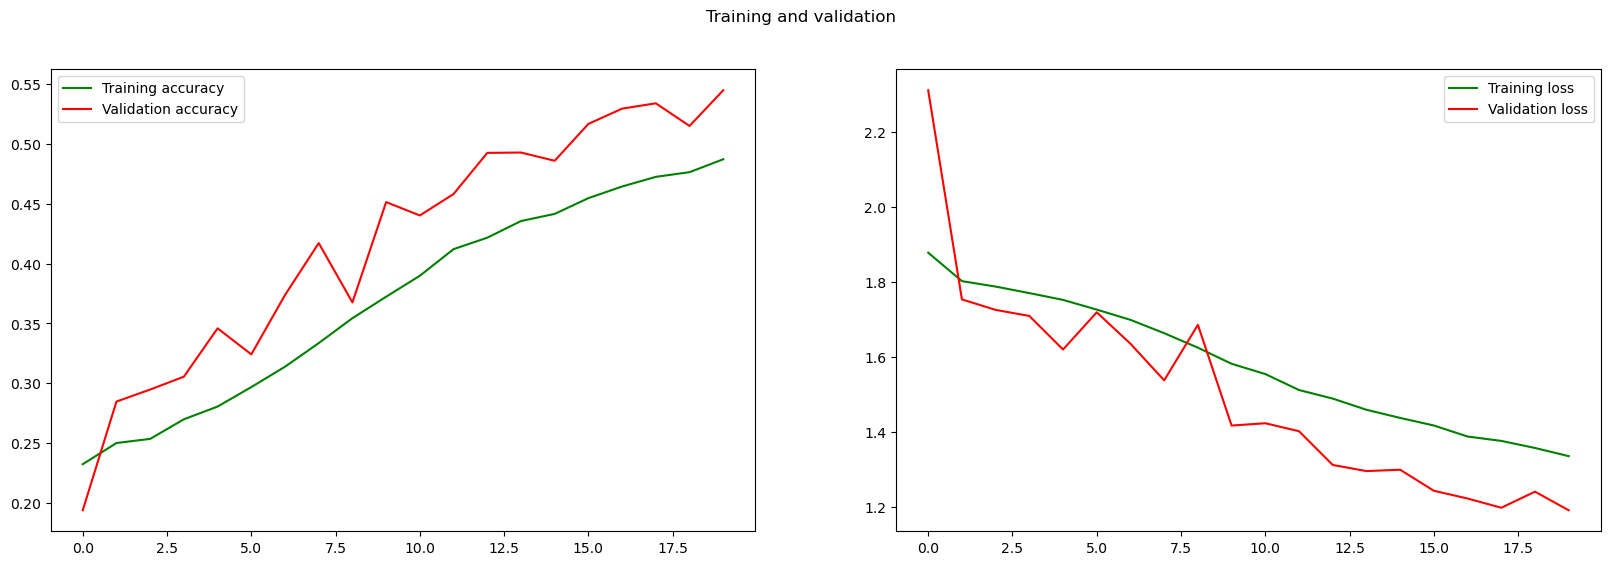

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'g', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'g', label='Training loss')
ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

110/110 [==============================] - 23s 203ms/step
              precision    recall  f1-score   support

       angry       0.38      0.55      0.45       958
     disgust       0.00      0.00      0.00       111
        fear       0.40      0.18      0.24      1024
       happy       0.82      0.78      0.80      1774
     neutral       0.47      0.60      0.53      1233
         sad       0.40      0.34      0.37      1067
    surprise       0.64      0.74      0.69       831

    accuracy                           0.55      6998
   macro avg       0.44      0.46      0.44      6998
weighted avg       0.54      0.55      0.53      6998





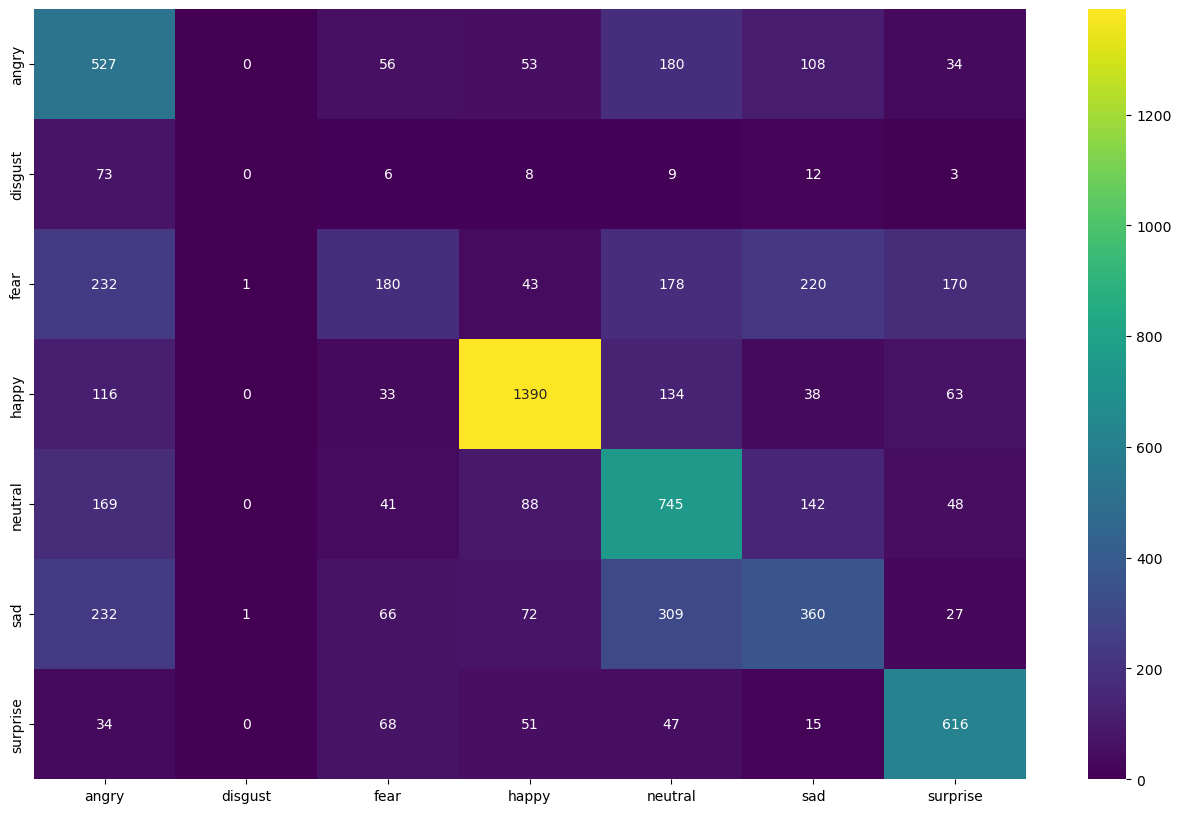

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(model.predict(test_generator), axis=-1)
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()), end='\n\n\n')

cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(16,10))
sns.heatmap(cm, cmap=plt.cm.viridis, annot=True, fmt='.0f', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.show()

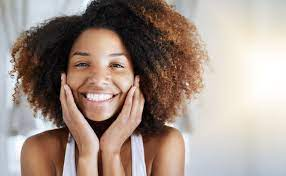

In [16]:
image = cv2.imread("C:/Users/NISCHITHA/Desktop/happy.jpeg")
from IPython.display import Image
Image(filename="C:/Users/NISCHITHA/Desktop/happy.jpeg")

In [17]:
import cv2
from tensorflow.python.keras.models import load_model
import os


# # load the trained model

model = tf.keras.models.load_model("model.h5",
    custom_objects={'Functional':tf.keras.models.Model})
# A list of emoticon categories
EMOTIONS = ['Angry', 'Disgust', 'Happy', 'Sad', 'Surprise', 'Neutral']
# Load image
img = image

# Trim the image to 48 x 48, and turn the grayscale image, normalization
frame = cv2.resize(img,(48,48),interpolation=cv2.INTER_BITS2)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) / 255.0

# Reinvent the image dimension
gray = gray.reshape(1,48,48,1)

# Output the prediction
predicts = model.predict(gray)[0]
label = EMOTIONS[predicts.argmax()]
for (i,j) in zip(range(7),EMOTIONS):
    predictss = predicts[i]
    print("{:^10s}".format(j)+"prediction rate is   {0:.2f}%".format(predictss))
print( "\n\n The system considers this expression to be:",label)

1/1 [==============================] - 0s 159ms/step
  Angry   prediction rate is   0.11%
 Disgust  prediction rate is   0.01%
  Happy   prediction rate is   0.26%
   Sad    prediction rate is   0.14%
 Surprise prediction rate is   0.16%
 Neutral  prediction rate is   0.23%


 The system considers this expression to be: Happy


In [18]:
if label == 'Angry':
    path = "C:/Users/NISCHITHA/Desktop/Angry.jpeg"
    print("Now Playing:", label)
    audio = Audio(filename="C:/Users/NISCHITHA/Desktop/Audio/Angry.mp3", autoplay=True)
    display(audio)
    
elif label == 'Disgust':
    path = "C:/Users/NISCHITHA/Desktop/Disgust.jpeg"
    print("Now Playing:", label)
    audio = Audio(filename="C:/Users/NISCHITHA/Desktop/Audio/Disgust.mp3", autoplay=True)
    display(audio)
    
elif label == 'Happy':
    path = "C:/Users/NISCHITHA/Desktop/happy.jpeg"
    print("Now Playing:", label)
    audio = Audio(filename="C:/Users/NISCHITHA/Desktop/Audio/Happy.mp3", autoplay=True)
    display(audio)
    
elif label == 'Sad':
    path = "C:/Users/NISCHITHA/Desktop/Sad.jpeg"
    print("Now Playing:", label)
    audio = Audio(filename="C:/Users/NISCHITHA/Desktop/Audio/Sad.mp3", autoplay=True)
    display(audio)
    
elif label == 'Surprise':
    path = "C:/Users/NISCHITHA/Desktop/Surprise.jpeg"
    print("Now Playing:", label)
    audio = Audio(filename="C:/Users/NISCHITHA/Desktop/Audio/Surprise.mp3", autoplay=True)
    display(audio)
    
elif label == 'Neutral':
    path = "C:/Users/NISCHITHA/Desktop/Neutral.jpeg"
    print("Now Playing:", label)
    audio = Audio(filename="C:/Users/NISCHITHA/Desktop/Audio/Neutral.mp3", autoplay=True)
    display(audio)


Now Playing: Happy
